# Bulldozer Sale Price Regression

The goal of this notebook is to predict the sale price of bulldozer based on time-series data

## 1. Problem Definition
> How well can we predict the future sale price of a bulldozer, given its characteristics and past time-series data of sale price?

## 2. Data
The data is downloaded from Kaggle Bluebook for Bulldozers Competition.
Available at https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012.
* Test.csv is the test set. It contains data from May 1, 2012 - November 2012.

## 3. Evaluation
The evaluation metrics used is RMSLE (Root Mean Squared Log Error) between actual and predicted auction prices.

**Note**: The goal for most regression evaluation metrics is to minimize the error. For this project, the goal is to build a machine\
learning model which minimizes RMSLE.

## 4. Features

Kaggle provides a data dictionary for all of the features in this dataset. The data dictionary can be viewed at:\
https://docs.google.com/spreadsheets/d/1iGpiBgsSi5oNlbMwbQR_W673uY5RSLN7/edit?usp=sharing&ouid=117689269769356404992&rtpof=true&sd=true

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

## Data Exploration (EDA)

In [2]:
# Import training and validation sets
df = pd.read_csv("dataset/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# Null Values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

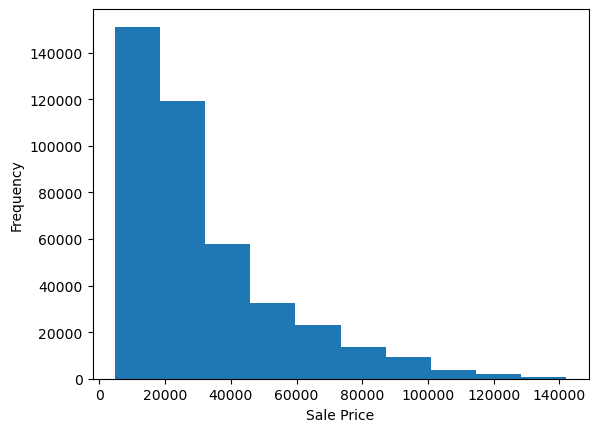

In [5]:
# Histogram of sales price
df["SalePrice"].plot.hist()
plt.xlabel("Sale Price");

In [6]:
# Parse dates into datetime type for more info on dates
df = pd.read_csv("dataset/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [7]:
df["saledate"][:500]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
495   2007-10-04
496   2009-08-13
497   2010-08-05
498   2011-06-02
499   2011-05-19
Name: saledate, Length: 500, dtype: datetime64[ns]

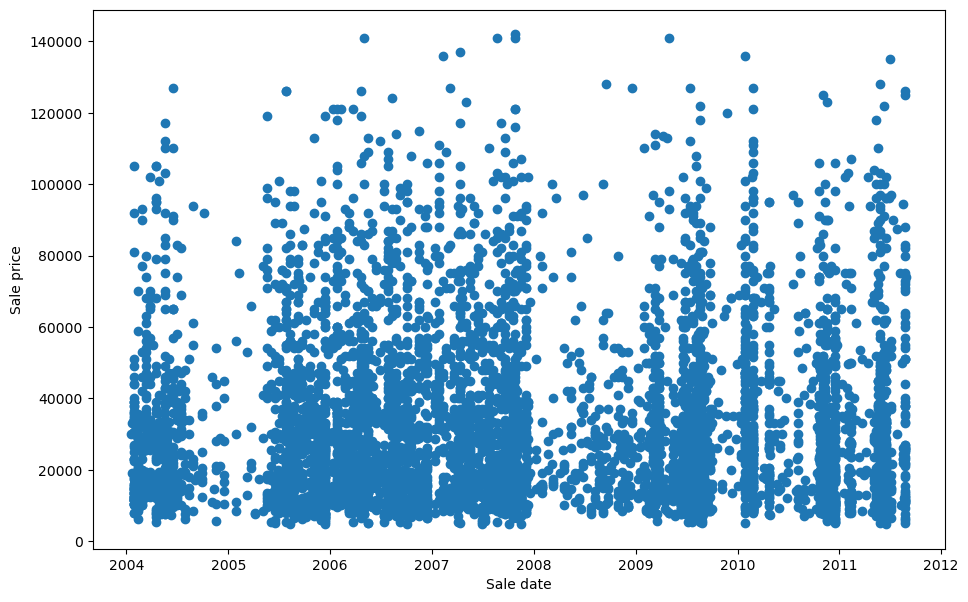

In [8]:
fig, ax = plt.subplots(figsize=(11, 7))

# Scatter plot of sale date and sale price
ax.scatter(df["saledate"][:6000], df["SalePrice"][:6000])
ax.set_xlabel("Sale date")
ax.set_ylabel("Sale price");

In [9]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort Data by sale date
Because it is a time-series data, it's a good idea to sort it by date.

In [10]:
# Sort data based on sale date
df = df.sort_values(by=["saledate"], ascending=True)
df.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN


### Make a copy of DataFrame
This is done to retain the original data when manipulating data in the copy

In [11]:
df_temp = df.copy()
df_temp.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN


### Feature Engineering
Create new attributes based on current attributes in data

### Add date columns based on 'saledate' column

In [12]:
df_temp["saleYear"] = df_temp["saledate"].dt.year
df_temp["saleMonth"] = df_temp["saledate"].dt.month
df_temp["saleDay"] = df_temp["saledate"].dt.day
df_temp["saleDayOfWeek"] = df_temp["saledate"].dt.dayofweek
df_temp["saleDayOfYear"] = df_temp["saledate"].dt.dayofyear

df_temp = df_temp.drop(labels="saledate", axis=1)
df_temp.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31


In [13]:
# Check values for different states
df["state"].value_counts().sort_values()

state
Washington DC         2
Puerto Rico          42
Rhode Island         83
Hawaii              118
South Dakota        244
Vermont             300
Massachusetts       347
Alaska              430
North Dakota        480
Delaware            510
Kansas              667
West Virginia       840
Nebraska            866
Oklahoma           1326
Montana            1336
Iowa               1336
Wyoming            1672
Michigan           1831
Oregon             1911
Idaho              2025
Virginia           2353
New Hampshire      2738
Wisconsin          2745
Unspecified        2801
Utah               3046
New Mexico         3631
Arkansas           3933
Indiana            4124
Maine              5096
Kentucky           5351
Louisiana          6627
Nevada             6932
Missouri           7178
Minnesota          7885
Connecticut        8276
New York           8639
Arizona            9364
South Carolina     9951
Pennsylvania      10234
Alabama           10292
Tennessee         10298
North Caro

## Modelling

In [14]:
# Models to use
from sklearn.ensemble import RandomForestRegressor

### Handle Non-Numerical Data into Numbers

In [15]:
### Convert string into pandas categories
for col in df_temp.columns:
    if (df_temp[col].dtypes in ['object']):
        df_temp[col] = df_temp[col].astype("category").cat.as_ordered()

In [16]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [17]:
# After changing type to categories, check for missing data
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [18]:
# Export
df_temp.to_csv("dataset/bluebook-for-bulldozers/trainval_tmp.csv", index=False)

### Fill Missing Values

In [19]:
# Missing numerical attributes
missing_num_cols = [col for col in df_temp.select_dtypes(include=["number"]).columns if df_temp[col].isnull().any()]

In [20]:
# Add is_missing column for each missing columns
for col in missing_num_cols:
    df_temp[col+"_is_missing"] = df_temp[col].isnull()

In [21]:
# Change categorical attributes to their codes
for col in df_temp.select_dtypes(include=["category"]).columns:
    df_temp[col+"_is_missing"] = df_temp[col].isnull()
    df_temp[col] = df_temp[col].cat.codes + 1

#### Split data into training and validation set
This is done to prevent data leakage from happening on imputation (info from validation set is leaked to training set)

In [22]:
# Split data (80-20)
df_train = df_temp[df_temp["saleYear"] != 2012]
df_val = df_temp[df_temp["saleYear"] == 2012]

X_train = df_train.drop(labels=["SalePrice"], axis=1)
y_train = df_train["SalePrice"]

X_val = df_val.drop(labels=["SalePrice"], axis=1)
y_val = df_val["SalePrice"]

print(df_train.shape,df_val.shape)

(401125, 103) (11573, 103)


In [23]:
from sklearn.impute import SimpleImputer
# Impute missing values using median fitted to training data

imp = SimpleImputer(strategy="median")

imp.fit(X_train)
X_train_imp = pd.DataFrame(imp.transform(X_train), columns=X_train.columns.tolist())
X_val_imp = pd.DataFrame(imp.transform(X_val), columns=X_val.columns.tolist())
X_train_imp.head(3)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770.0,1126363.0,8434.0,132.0,18.0,1974.0,0.0,0.0,4593.0,1744.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1821514.0,1194089.0,10150.0,132.0,99.0,1980.0,0.0,0.0,1820.0,559.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1505138.0,1473654.0,4139.0,132.0,99.0,1978.0,0.0,0.0,2348.0,713.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [24]:
X_val_imp.head(3)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,4449186.0,2318824.0,26964.0,173.0,99.0,1996.0,0.0,0.0,2269.0,711.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1222855.0,531393.0,23926.0,121.0,3.0,1000.0,8145.0,2.0,85.0,19.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,6258613.0,1810917.0,13260.0,149.0,99.0,2000.0,24.0,2.0,1115.0,328.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [25]:
# Check for missing values
missing_cnt_train = 0
missing_cnt_val = 0
for col in X_train_imp.columns:
    if X_train_imp[col].isna().sum() :
        missing_cnt_train += 1

for col in X_val_imp.columns:
    if X_val_imp[col].isna().sum() :
        missing_cnt_val += 1
        
print(missing_cnt_train, missing_cnt_val)

0 0


### Model Training & Evaluation

#### Custom evaluation function

In [26]:
from sklearn.metrics import root_mean_squared_log_error, mean_absolute_error, r2_score
# RMSLE, MAE, and R^2 Score evaluation metric
def show_scores(model):
    train_prediction = model.predict(X_train_imp)
    val_prediction = model.predict(X_val_imp)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_prediction),
        "Validation MAE" : mean_absolute_error(y_val, val_prediction),
        "Training RMSLE": root_mean_squared_log_error(y_train, train_prediction),
        "Validation RMSLE": root_mean_squared_log_error(y_val, val_prediction),
        "Training R^2": r2_score(y_train, train_prediction),
        "Validation R^2": r2_score(y_val, val_prediction)
    }
    return scores

#### Hyperparameter tuning on subset of data
Done to reduce amount of training time for hyperparameter tuning

In [38]:
# Model Instantiation
rf_model = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators=100, max_samples=20000)

In [39]:
%%time
# Random Forest Training
rf_model.fit(X_train_imp, y_train)

CPU times: total: 1min 32s
Wall time: 6.66 s


RandomForestRegressor(max_samples=20000, n_jobs=-1, random_state=42)

In [40]:
show_scores(rf_model)

{'Training MAE': 5047.9944919164855,
 'Validation MAE': 6754.1377611682365,
 'Training RMSLE': 0.23695842660674307,
 'Validation RMSLE': 0.27792674678471974,
 'Training R^2': 0.8833629837266058,
 'Validation R^2': 0.8501458046953286}

##### Hyperparameter Tuning

In [35]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    "n_estimators": np.arange(50, 300, 50),
    "max_depth": [None, 3, 5, 8, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt"],
    "max_samples": [20000]
}

rs_cv_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                                 param_distributions=rf_grid,
                                 n_iter=100,
                                 cv=5,
                                 verbose=True)

rs_cv_model.fit(X_train_imp, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 3h 3min 46s
Wall time: 18min 27s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 8, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250])},
                   verbose=True)

In [36]:
rs_cv_model.best_params_

{'n_estimators': 250,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_samples': 20000,
 'max_features': 0.5,
 'max_depth': None}

In [37]:
show_scores(rs_cv_model)

{'Training MAE': 5417.420286654462,
 'Validation MAE': 6810.991687025565,
 'Training RMSLE': 0.25023214013867384,
 'Validation RMSLE': 0.2807424025439489,
 'Training R^2': 0.8680610064671735,
 'Validation R^2': 0.8494437830547859}

#### Model with best hyperparameters

Based on Randomized Search CV, best n_estimators was 250, but previous baseline model shows that n_estimators 100\
produce better results

In [41]:
%%time

# Ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=100, min_samples_leaf=1,
                                    min_samples_split=14, max_features=0.5, max_depth=None, n_jobs=-1, random_state=42, max_samples=None)

ideal_model.fit(X_train_imp, y_train)

CPU times: total: 12min 17s
Wall time: 55 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_jobs=-1,
                      random_state=42)

In [78]:
# Ideal model scores
show_scores(ideal_model)

{'Training MAE': 2926.928724023889,
 'Validation MAE': 5918.843241997182,
 'Training RMSLE': 0.14343207917693876,
 'Validation RMSLE': 0.2444258477236538,
 'Training R^2': 0.9597212791599464,
 'Validation R^2': 0.8833607837165849}

#### Predictions on Test Data

In [69]:
df_test = pd.read_csv("dataset/bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])

In [70]:
### Preprocess test data
def preprocess_data(df):
    df["saleYear"] = df["saledate"].dt.year
    df["saleMonth"] = df["saledate"].dt.month
    df["saleDay"] = df["saledate"].dt.day
    df["saleDayOfWeek"] = df["saledate"].dt.dayofweek
    df["saleDayOfYear"] = df["saledate"].dt.dayofyear
    df = df.drop(labels="saledate", axis=1)

    # Fill numeric rows with median
    for col in missing_num_cols:
        df[col+"_is_missing"] = df[col].isnull()
        
    # Fill categorical missing data and turn it into numbers
    for col in df.columns:
        if (df[col].dtypes in ['object']):
            df[col] = df[col].astype("category").cat.as_ordered()
    
    for col in df.select_dtypes(include=["category"]).columns:
        df[col+"_is_missing"] = df[col].isnull()
        df[col] = df[col].cat.codes + 1

    df = pd.DataFrame(imp.transform(df), columns=df.columns.tolist())

    return df

In [71]:
# Process the test data
df_test = preprocess_data(df_test)

In [74]:
# Predict with model
test_preds = ideal_model.predict(df_test)

In [75]:
test_preds

array([17235.85943419, 15513.96916168, 48289.36657317, ...,
       13469.61210699, 16489.10886049, 28192.61353672])

In [76]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829.0,17235.859434
1,1227844.0,15513.969162
2,1227847.0,48289.366573
3,1227848.0,66968.602614
4,1227863.0,60501.485122
...,...,...
12452,6643171.0,39126.392538
12453,6643173.0,13001.427391
12454,6643184.0,13469.612107
12455,6643186.0,16489.108860


In [77]:
# Export
df_preds.to_csv("dataset/bluebook-for-bulldozers/test_predictions.csv", index=False)

### Feature Importance
Finding out attributes that have the most importance when predicting target variables

In [81]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns, "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

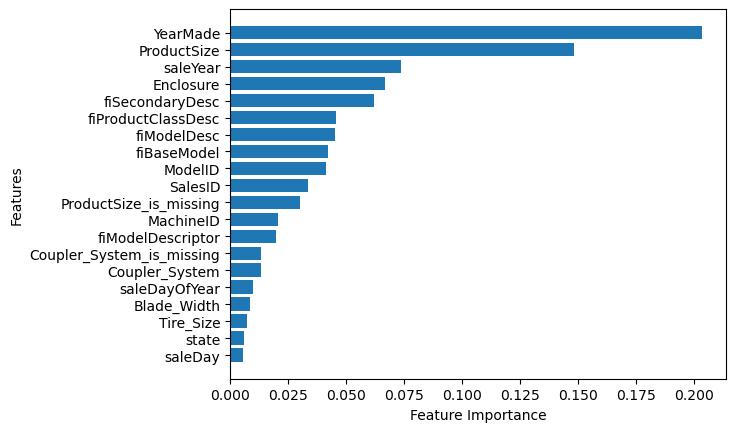

In [82]:
# Find feature importance
plot_features(X_train.columns, ideal_model.feature_importances_)

In [83]:
# Exploring the important features
df["ProductSize"].value_counts()

ProductSize
Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: count, dtype: int64

In [84]:
df["YearMade"].value_counts()

YearMade
1000    39391
2005    22096
1998    21751
2004    20914
1999    19274
        ...  
2012        1
1949        1
1942        1
2013        1
1937        1
Name: count, Length: 73, dtype: int64